Importing Dependencies

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [45]:
# Loading csv dataset into Pandas DataFrame
gold_dataset = pd.read_csv("gld_price_data.csv")

In [46]:
# Printing first 5 rows of DataFrame
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [47]:
# Printing last 5 rows of DataFrame
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [48]:
# Number of rows and columns
gold_dataset.shape

(2290, 6)

In [49]:
# Getting information about DataFrame
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [50]:
# Checking missing values
gold_dataset.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [51]:
# Getting the statistical measures 
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

    1. Positive Correlation
    
    2. Negative Correlation

In [52]:
correlation = gold_dataset.corr()

C:\Users\yar69\AppData\Local\Temp\ipykernel_5432\4191627151.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_dataset.corr()


<Axes: >

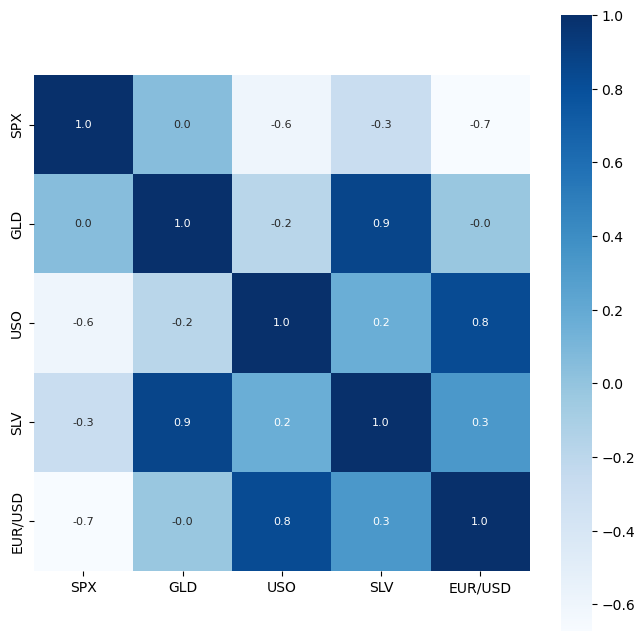

In [53]:
# Constructing a heatmap to understand correlation
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

In [54]:
# Correlation value of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


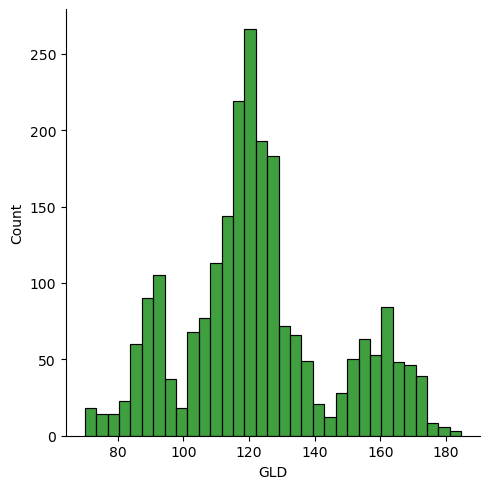

In [55]:
# Checking the distribution of the GLD Price
sns.displot(gold_dataset['GLD'], color = 'green')

Splitting Features and Target

In [56]:
X = gold_dataset.drop(['Date', 'GLD'], axis=1)
y = gold_dataset['GLD']

In [57]:
print(X)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting the Training data and Test data

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

Model Training: Random Forest Regressor

In [59]:
regressor = RandomForestRegressor(n_estimators=100)

In [60]:
# fitting the model
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [61]:
test_data_prediction = regressor.predict(X_test)

In [62]:
print(test_data_prediction)

[103.67259819 141.08799966 121.68779865  87.08419897 116.83719972
 124.51920002 117.07470144 162.55750083 120.8531007  126.92509949
 119.71929868 164.26160174 142.11080245  79.77370021 138.95929856
 124.55990144 156.27410051 124.22909981 134.24779883 125.00550091
 119.04790114 117.34510107 125.07539894  97.5574998  134.59499626
 124.99390018 129.35310241 153.65830006  90.41580191 151.86910235
 115.68269821 122.24729952  86.15139938 125.03509923 123.94719962
 147.30559855 115.32829938  91.41210207  93.75709975 127.11460009
 120.84149951 160.20230487 170.65769912 166.02520236  90.17300044
 155.39250102 120.25890008 164.83970063  96.80250285 104.43329957
 114.31790006 120.820199   161.48019943 109.34419925 108.99450019
  94.30880123 152.11679951  78.3097995   89.26339992  84.38379795
  91.65690134 112.05390093 160.29589892 105.43609997 115.67480033
 124.99679839 113.4065988  120.54990001 154.55190186 120.06830031
  79.26410005 165.00250032 163.32709924 124.8831993  167.10440119
 121.86359

In [65]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.990440004691253


Compare the Actual values and predicted values in a plot

In [66]:
y_test = list(y_test)

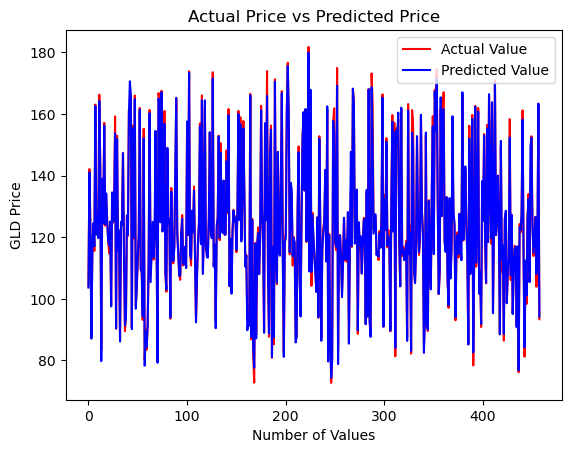

In [67]:
plt.plot(y_test, color='red', label='Actual Value')
plt.plot(test_data_prediction, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()